<h1 align=center>Naive Bayes</h1>

<p><code>Naive Bayes</code> methods are a set of supervised learning algorithms
based on applying Bayes’ theorem with the “naive” assumption of
conditional independence between every pair of features given the
value of the class variable. Bayes’ theorem states the following
relationship, given class variable $y$ and dependent feature vector  $x_1$ through $x_n$</p>


$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$

Using the naive conditional independence assumption that

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

for all , this relationship is simplified to

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$
                                 
Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:

$ \begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align} $

and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$ the former is then the relative frequency of class $y$  in the training set.


The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$

    In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. (For theoretical reasons why naive Bayes works well, and on which types of data it does, see the references below.)

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

### Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$


The parameters  $\sigma_y$
 and $\mu_y$
 are estimated using `maximum likelihood`.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [8]:
Data = load_iris()

In [9]:
Data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
Data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df = pd.DataFrame(Data.data,columns=Data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df['Target'] = Data.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

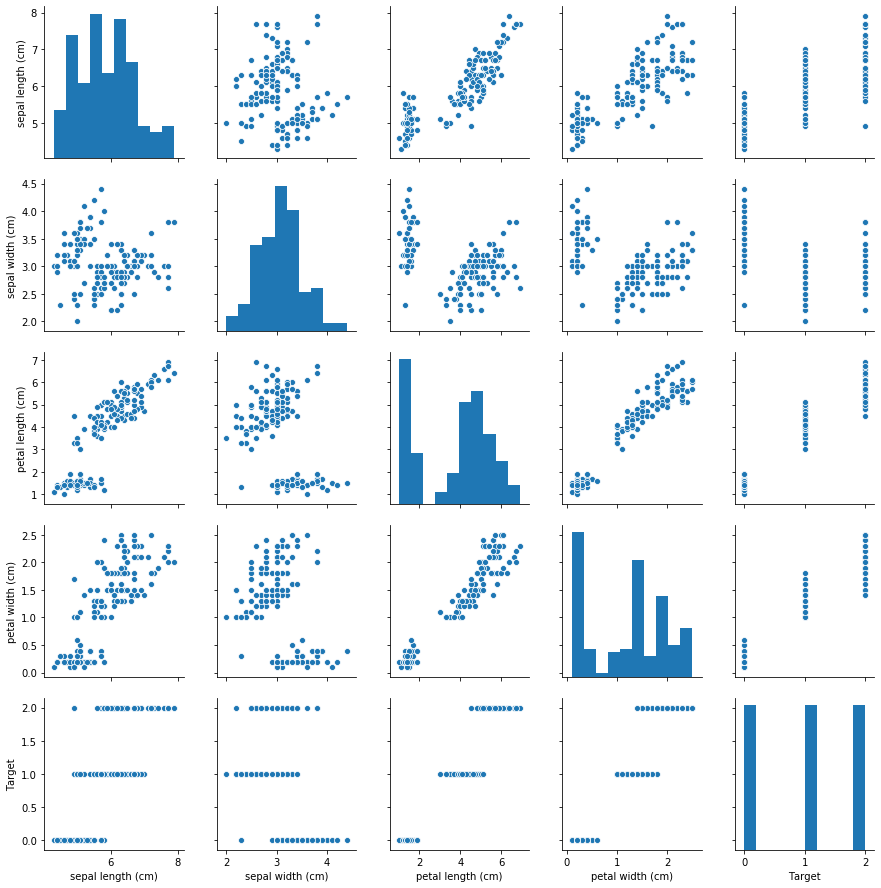

In [93]:
sns.pairplot(df)

In [94]:
x = df.drop('Target',axis=1)
y = df['Target']

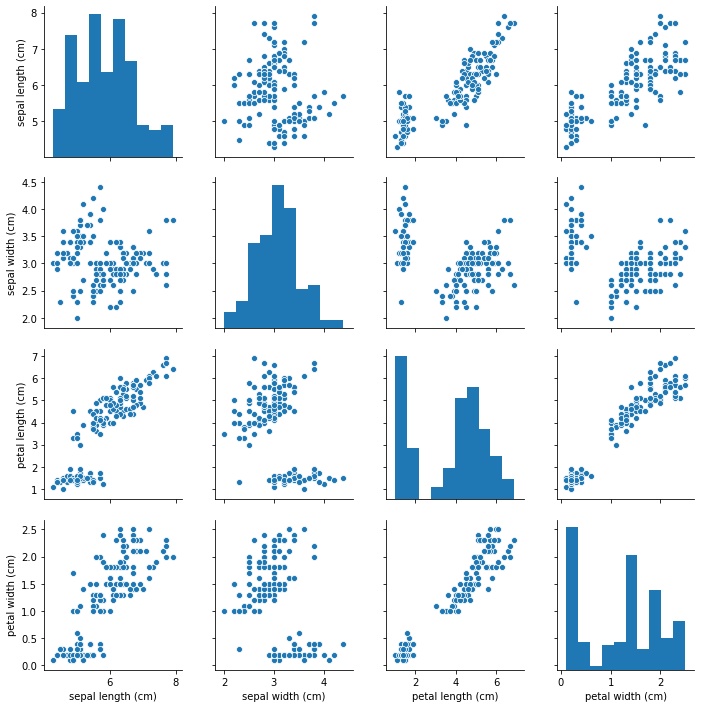

In [95]:
sns.pairplot(x)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [69]:
X_train.shape

(97, 4)

In [70]:
X_test.shape

(53, 4)

In [71]:
y_train.shape

(97,)

In [72]:
y_test.shape

(53,)

In [73]:
gnb = GaussianNB()

In [74]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
New_preddiction = gnb.predict(X_test)
New_preddiction

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1])

In [76]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != New_preddiction).sum()))

Number of mislabeled points out of a total 53 points : 2


In [80]:
gnb.score(X_train,y_train)*100

95.87628865979381

In [83]:
gnb.score(X_test,y_test)*100

96.22641509433963

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
cm = confusion_matrix(y_test,New_preddiction)
cm

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  2, 14]], dtype=int64)

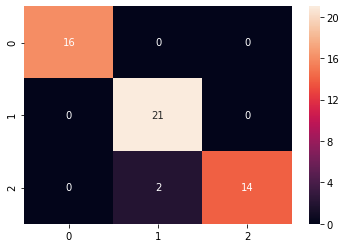

In [90]:
sns.heatmap(cm,annot=True)

In [91]:
print(classification_report(y_test,New_preddiction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95        21
           2       1.00      0.88      0.93        16

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.97      0.96      0.96        53



### Bernoulli Naive Bayes
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a `binary-valued (Bernoulli, boolean) variable`. Therefore, this class requires samples to be represented as `binary-valued` feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on

$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$

which differs from multinomial NB’s rule in that it explicitly penalizes the non-occurrence of a feature $i$  that is an indicator for class $y$, where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

In [96]:
from sklearn.naive_bayes import BernoulliNB

In [97]:
clf = BernoulliNB()

In [99]:
clf.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [101]:
y_pred = clf.predict(X_test)

In [102]:
pd.DataFrame({'Actual_data':y_test,
             "New_Predication":y_pred})

,Actual_data,New_Predication
114,2,0
62,1,0
33,0,0
107,2,0
7,0,0
100,2,0
40,0,0
86,1,0
76,1,0
71,1,0


In [104]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 53 points : 37


In [106]:
clf.score(X_train,y_train)

0.35051546391752575

In [107]:
clf.score(X_test,y_test)

0.3018867924528302

### Multinomial Naive Bayes

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$,where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample belonging to class $y$.
The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$

where

$N_{yi} = \sum_{x \in T} x_i$ s the number of times feature $i$ appears in a sample of class $y$ in the training set $T$ and $N_{y} = \sum_{i=1}^{n} N_{yi}$    the total count of all features for class $y$



The smoothing priors $\alpha \ge 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting  $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$ is called Lidstone smoothing.

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
mnb = MultinomialNB()

In [112]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
y_pred = mnb.predict(X_test)

In [115]:
pd.DataFrame({"Actual":y_test,
              "predicated":y_pred})

,Actual,predicated
114,2,2
62,1,2
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,2
76,1,2
71,1,2


In [117]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 53 points : 21


In [119]:
mnb.score(X_train,y_train)

0.7422680412371134

In [121]:
mnb.score(X_test,y_test)

0.6037735849056604

In [123]:
cm = confusion_matrix(y_test,y_pred)

In [125]:
cm

array([[16,  0,  0],
       [ 0,  0, 21],
       [ 0,  0, 16]], dtype=int64)

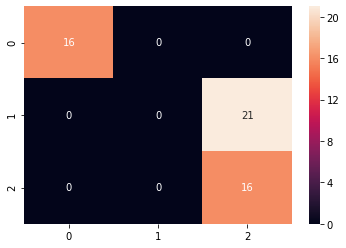

In [128]:
sns.heatmap(cm,annot=True)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00        21
           2       0.43      1.00      0.60        16

    accuracy                           0.60        53
   macro avg       0.48      0.67      0.53        53
weighted avg       0.43      0.60      0.48        53



c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  Complement Naive Bayes
ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for `imbalanced data sets`. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks. The procedure for calculating the weights is as follows:

$ \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align} $
                         
                         
where the summations are over all documents $j$ not in class $c$, $d_{ij}$ s either the count or tf-idf value of term $i$ in document $j$ $\alpha_i$ is a smoothing hyperparameter like that found in MNB, and $\alpha = \sum_{i} \alpha_i$ The second normalization addresses the tendency for longer documents to dominate parameter estimates in MNB. The classification rule is



$\hat{c} = \arg\min_c \sum_{i} t_i w_{ci}$


In [143]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [146]:
data = pd.read_json('Datasets/News_Category_Dataset_v2.json/News_Category_Dataset_v2.json',lines=True)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [147]:
# 2. Remove punctiation & convert to lowercase:
data['headline_processed'] = data.headline.str.replace('[{}]'.format(string.punctuation), '').str.lower()
data['short_description_processed'] = data.short_description.str.replace('[{}]'.format(string.punctuation), '').str.lower()

In [148]:
data.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [149]:
def category_cleaner(x):
    
    if x == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif x == 'PARENTING':
        return 'PARENTS'
    elif x == 'ARTS' or x == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif x == 'STYLE':
        return 'STYLE & BEAUTY'
    elif x == 'COLLEGE':
        return 'EDUCATION'
    elif x == 'TASTE':
        return 'FOOD & DRINK'
    else:
        return x
    
data['category'] = data.category.apply(category_cleaner)

In [151]:
le = LabelEncoder()
data_labels = le.fit_transform(data.category)

In [152]:
list(le.classes_)

['ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COMEDY',
 'CRIME',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'GREEN',
 'HEALTHY LIVING',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTS',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE & BEAUTY',
 'TECH',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST']

In [153]:
data.authors.unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [154]:
data['authors'] = data.authors.apply(lambda x: x.split(',')[0])
data['authors'] = data.authors.str.replace(' ', '', regex=False)
data.authors.unique()

array(['MelissaJeltsen', 'AndyMcDonald', 'RonDicker', ..., 'SarahCosta',
       'MateoGutierrez', 'JohnGiacobbi'], dtype=object)

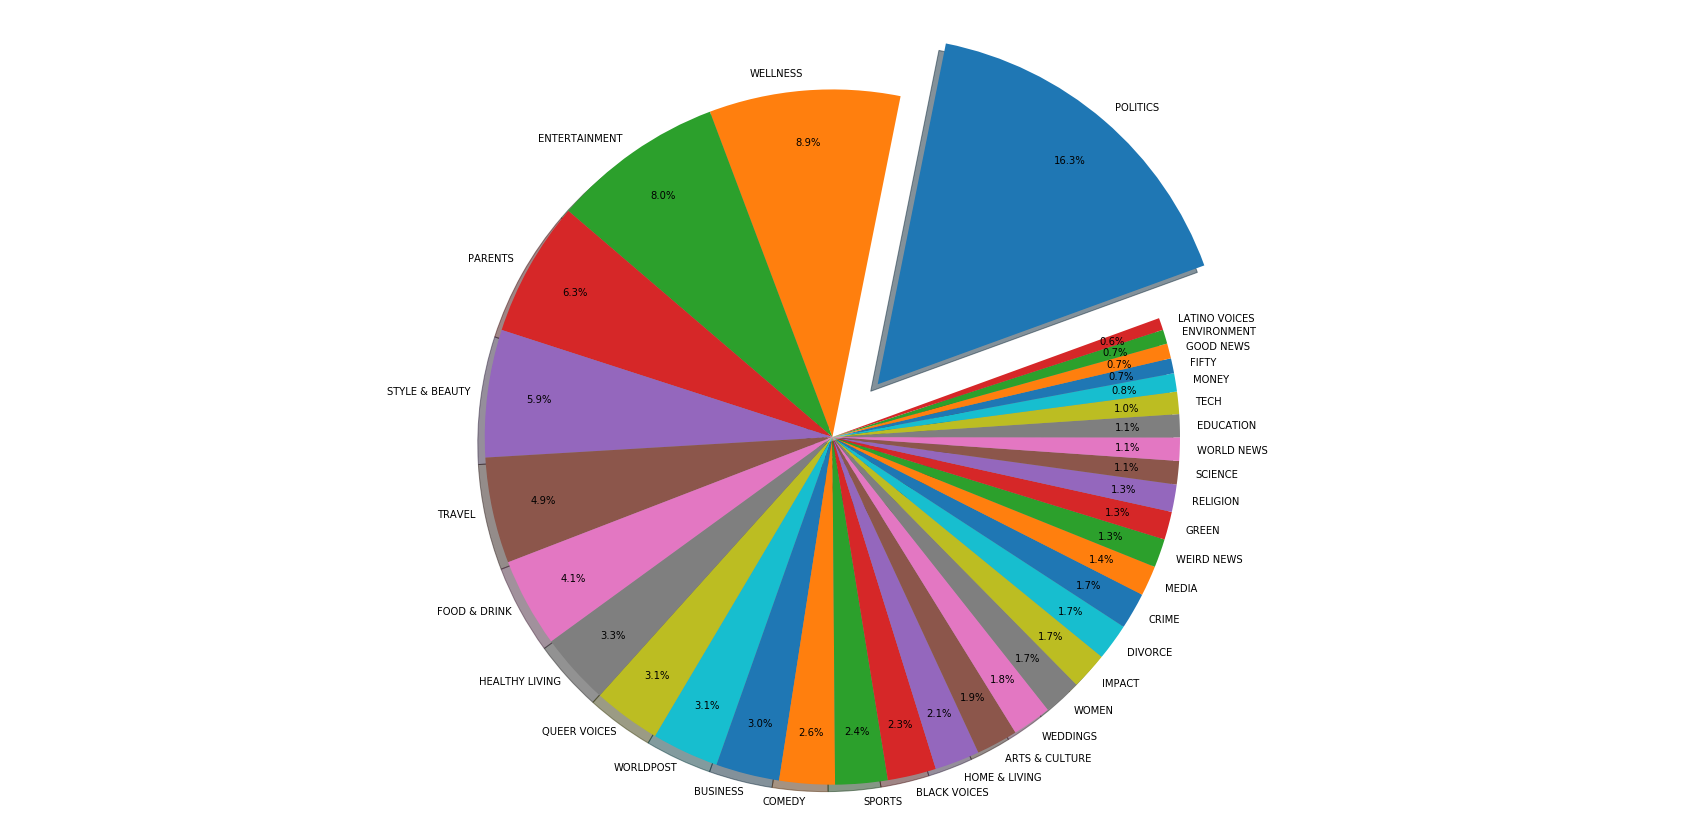

In [155]:
plt.figure(figsize=(30,15))
sizes = data.category.value_counts().values
labels = data.category.value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20, 
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

In [156]:
# Splitting into train sets and test sets
x_train, x_test, y_train, y_test = train_test_split(data, data_labels, 
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=555)

In [158]:
x_train.shape

(160682, 8)

In [159]:

counter = CountVectorizer(stop_words='english')

In [160]:
train_headline_counts = counter.fit_transform(x_train.headline_processed)
test_headline_counts = counter.transform(x_test.headline_processed)

In [162]:
train_short_description_counts = counter.fit_transform(x_train.short_description_processed)
test_short_description_counts = counter.transform(x_test.short_description_processed)

In [167]:
headline_soft_predictions = classifier.predict_proba(test_headline_counts)
headline_predictions = classifier.predict(test_headline_counts)

classifier.fit(train_short_description_counts, y_train)
short_description_soft_predictions = classifier.predict_proba(test_short_description_counts)
short_description_predictions = classifier.predict(test_short_description_counts)

In [169]:
soft_predictions = (headline_soft_predictions + short_description_soft_predictions) / 2
predictions = np.argmax(soft_predictions, axis = 1)
print('Accuracy without tokenization: {}'.format(accuracy_score(predictions, y_test)))

Accuracy without tokenization: 0.6228622638221603


In [171]:
train_counts = counter.fit_transform(x_train.headline_processed.str.cat(x_train.short_description_processed))
test_counts = counter.transform(x_test.headline_processed.str.cat(x_test.short_description_processed))
classifier.fit(train_counts, y_train)
predictions_combined =  classifier.predict(test_counts)
text_combined_soft_predictions = classifier.predict_proba(test_counts)

In [173]:
print('Accuracy with combined text and without tokenization: {}'.format(accuracy_score(predictions, y_test)))

Accuracy with combined text and without tokenization: 0.6228622638221603


|Model|Data type|Difference|
|------|--------|----------|
|Multinomial|Discrete eg=count||
|Gaussian|Continuous|
|Bernoulli|Binary(T/F,Y/N,0/1)|